data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


<IPython.core.display.Javascript object>


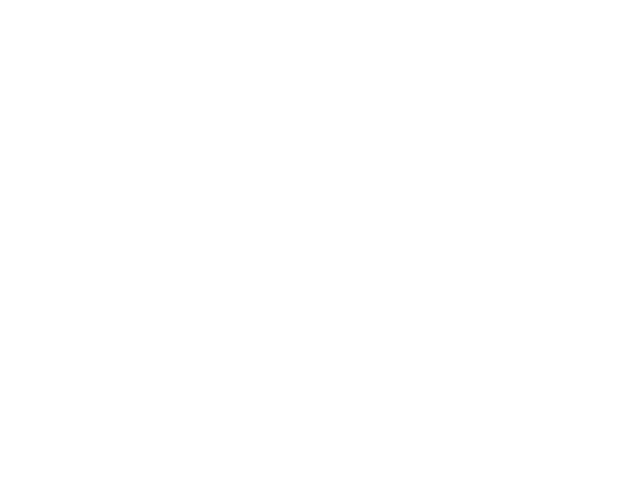

<IPython.core.display.Javascript object>


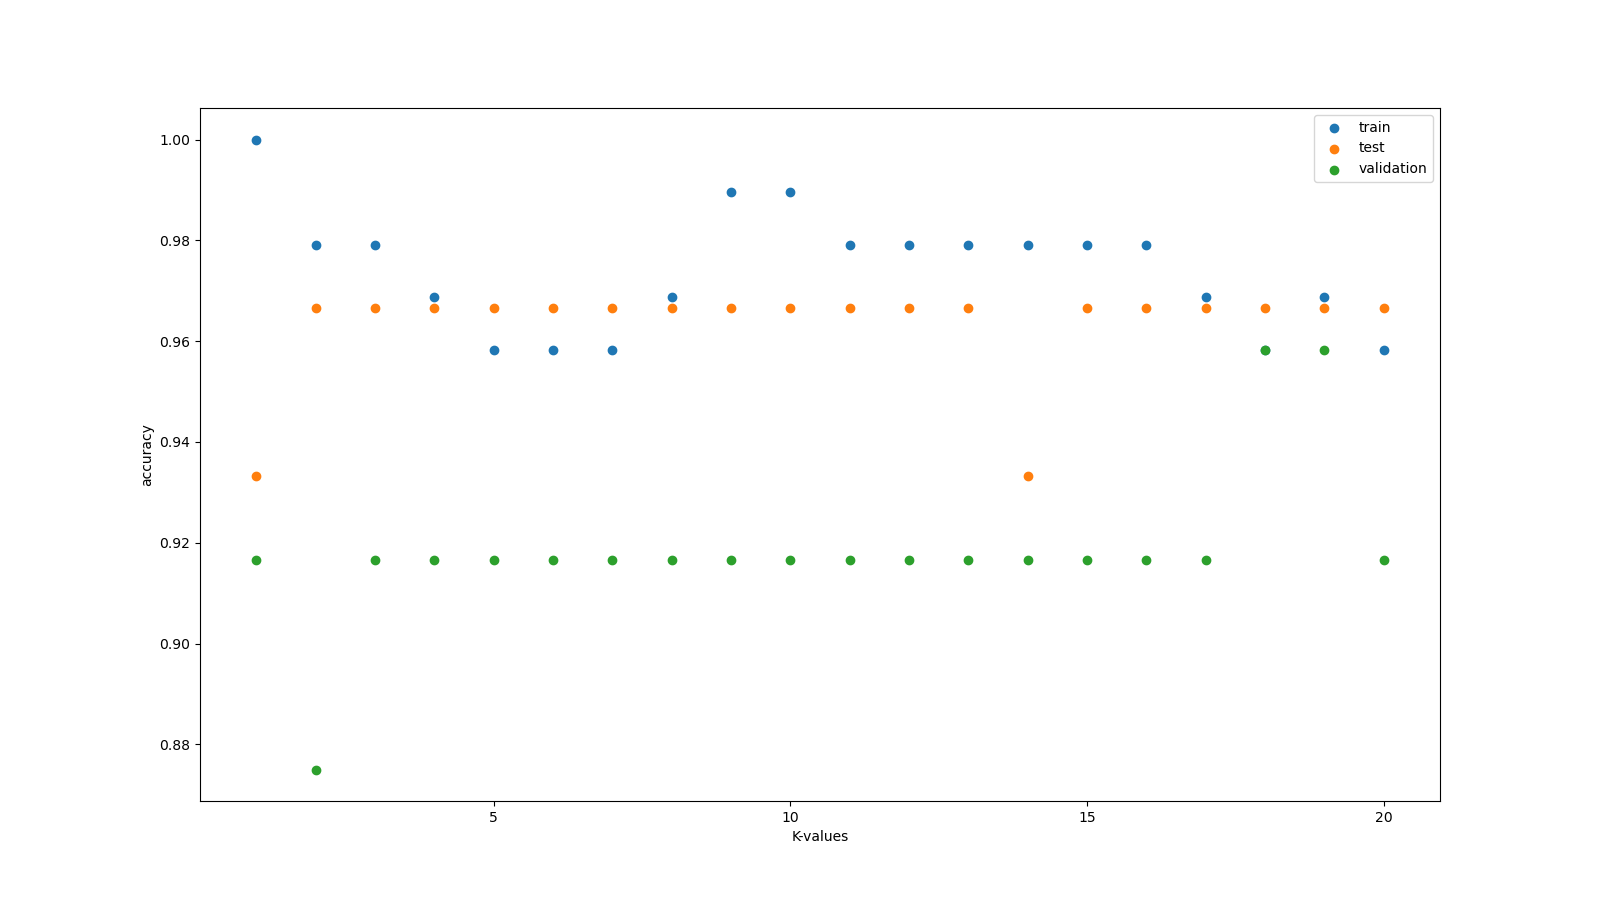


The best k = 19 , score = 0.96875



<IPython.core.display.Javascript object>


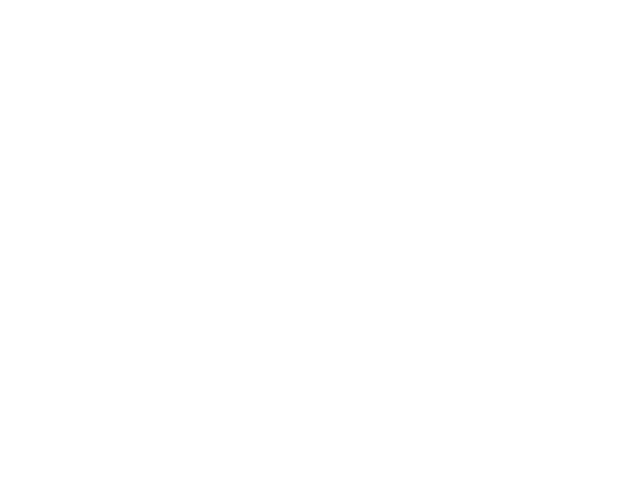

<IPython.core.display.Javascript object>


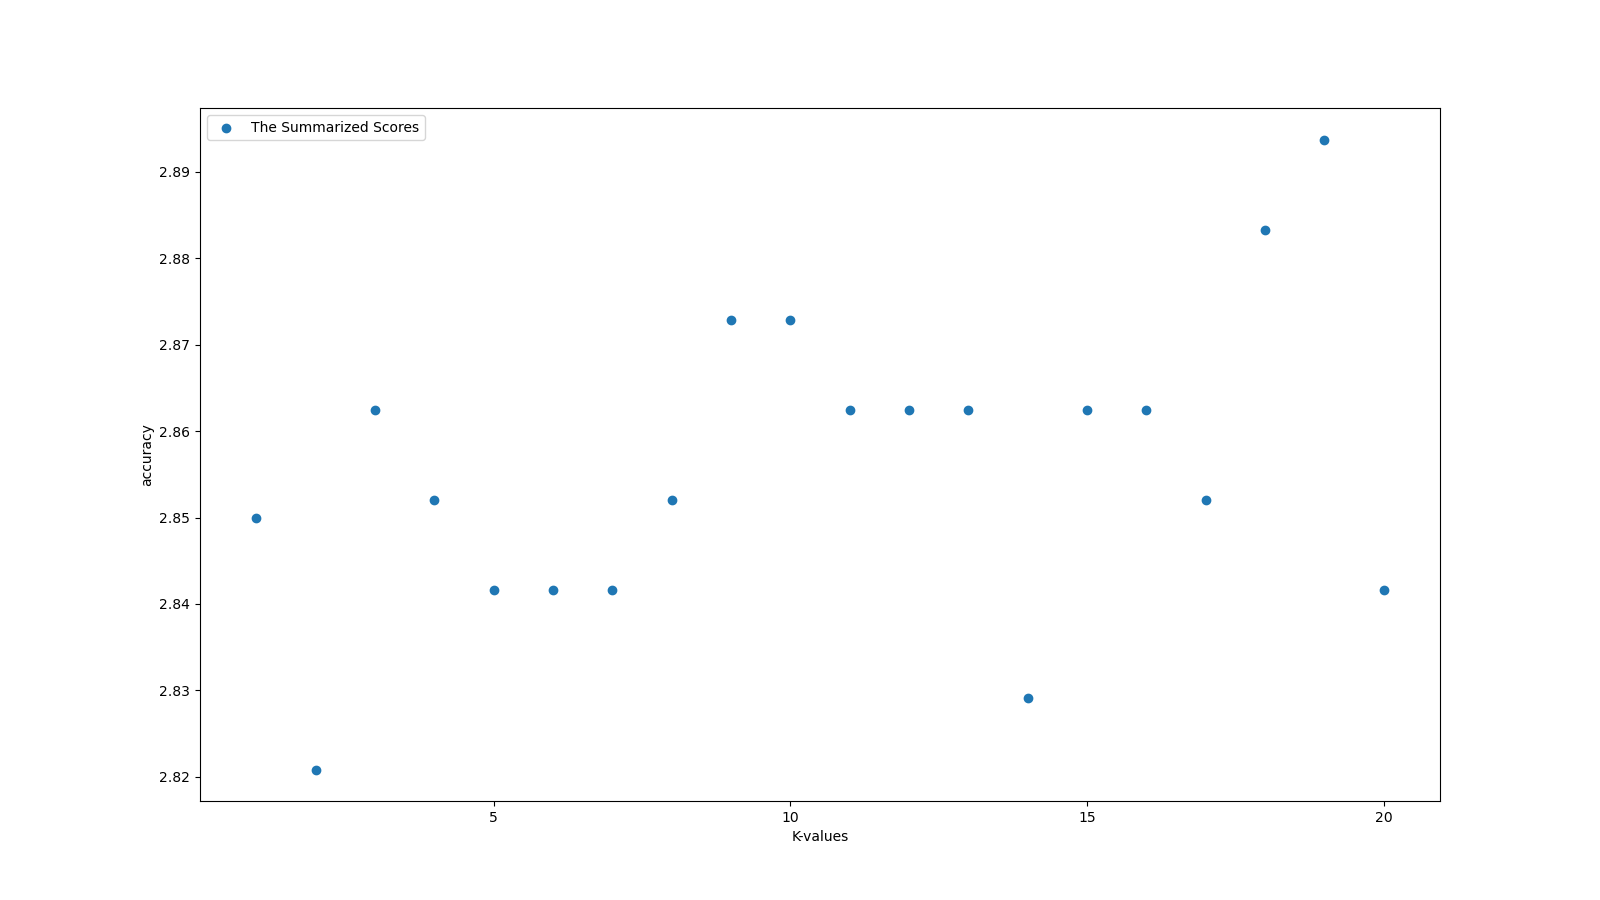

In [7]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())

X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
#print(df_iris)

# shuffle data¶

#---- Split to train and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=42)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_iris, train_size=0.8, random_state=47, shuffle=True)
train_df, valid_df = train_test_split(train_df, train_size=0.8, random_state=47, shuffle=True)

#----- Preparring Data to Train K-NN
# select X (features) and y (labels)
X_train = train_df.iloc[:,:-2]
y_train = train_df.iloc[:, -2]
X_test = test_df.iloc[:,:-2]
y_test = test_df.iloc[:, -2]
X_valid = valid_df.iloc[:,:-2]
y_valid = valid_df.iloc[:, -2]

#------ Normalization ---
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

#----- Training K-NN
from sklearn.neighbors import KNeighborsClassifier
scores_train = []
scores_test=[]
scores_valid=[]

for k_range in range(1,21):
    classifier = KNeighborsClassifier(k_range)
    classifier.fit(X_train, y_train)
    
    #----- Simulation (Prediction)
    y_train_pred = classifier.predict(X_train)
    y_pred = classifier.predict(X_test)
    y_validation = classifier.predict(X_valid)
    
    #-------Print results
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    # result1_1 = confusion_matrix(y_test, y_pred)
    # result1_2 = confusion_matrix(y_valid, y_validation)
    # print("Confusion Matrix for testing SET:")
    # print(result1_1)
    # print("Confusion Matrix for validation SET:")
    # print(result1_2)
    
    # result2_1 = classification_report(y_test, y_pred)
    # print("Classification Report for Testing Set:",)
    # print (result2_1)
    # result2_2 = classification_report(y_valid, y_validation)
    # print("Classification Report for Validation Set:",)
    # print (result2_1)
    
    result3_1 = accuracy_score(y_train, y_train_pred)
    result3_2 = accuracy_score(y_test,y_pred)
    result3_3 = accuracy_score(y_valid,y_validation)
    # print(f"\nAccuracy with [K={k_range}] are :")
    # print(f"\t\t-training Set is:{format(result3_1, '.3f')}")
    # print(f"\t\t-testing Set is:{format(result3_2, '.3f')}")
    # print(f"\t\t-validation Set is:{format(result3_3, '.3f')}\n")
    scores_train.append(result3_1)
    scores_test.append(result3_2)
    scores_valid.append(result3_3)

scores=pd.DataFrame(scores_train, columns=['train'])
scores['test']=pd.DataFrame(scores_test)
scores['validation']=pd.DataFrame(scores_valid)
scores['best']=scores.train+scores.test+scores.validation

fig=plt.figure()
fig = plt.figure(figsize = (16,9))
plt.ylabel('accuracy')
plt.xlabel('K-values')
#plt.legend()

plt.xticks([0,5,10,15,20])
plt.scatter(range(1,21), scores['train'])
plt.scatter(range(1,21), scores['test'])
plt.scatter(range(1,21), scores['validation'])
plt.legend(['train', 'test', 'validation'])

k_best = scores['best'].argmax()-1 # 'compute the best k'
score_best = scores.iloc[k_best+1,0] #'compute the best score'
print ('\nThe best k = {} , score = {}\n'.format(k_best,score_best ))

fig=plt.figure()
fig = plt.figure(figsize = (16,9))
plt.ylabel('accuracy')
plt.xlabel('K-values')

plt.xticks([0,5,10,15,20])
plt.scatter(range(1,21), scores['best'])
plt.legend(['The Summarized Scores'])


<IPython.core.display.Javascript object>


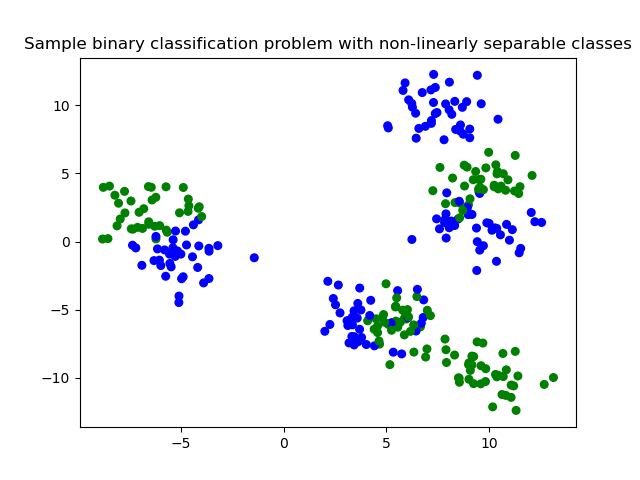

In [8]:
#============= SECOND PART===== Synthetic dataset=====

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
#matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

<IPython.core.display.Javascript object>


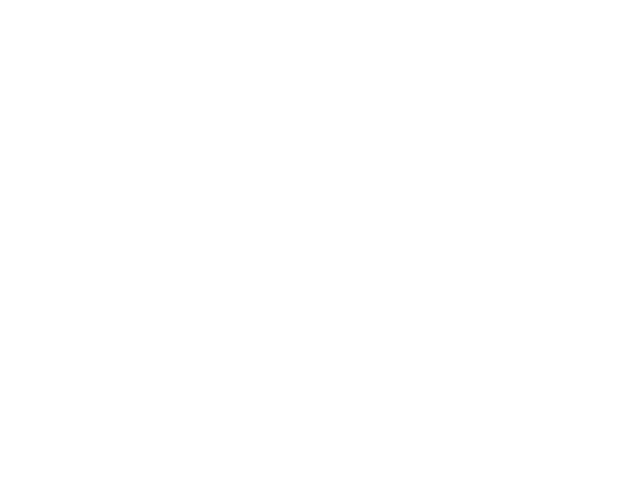

<IPython.core.display.Javascript object>


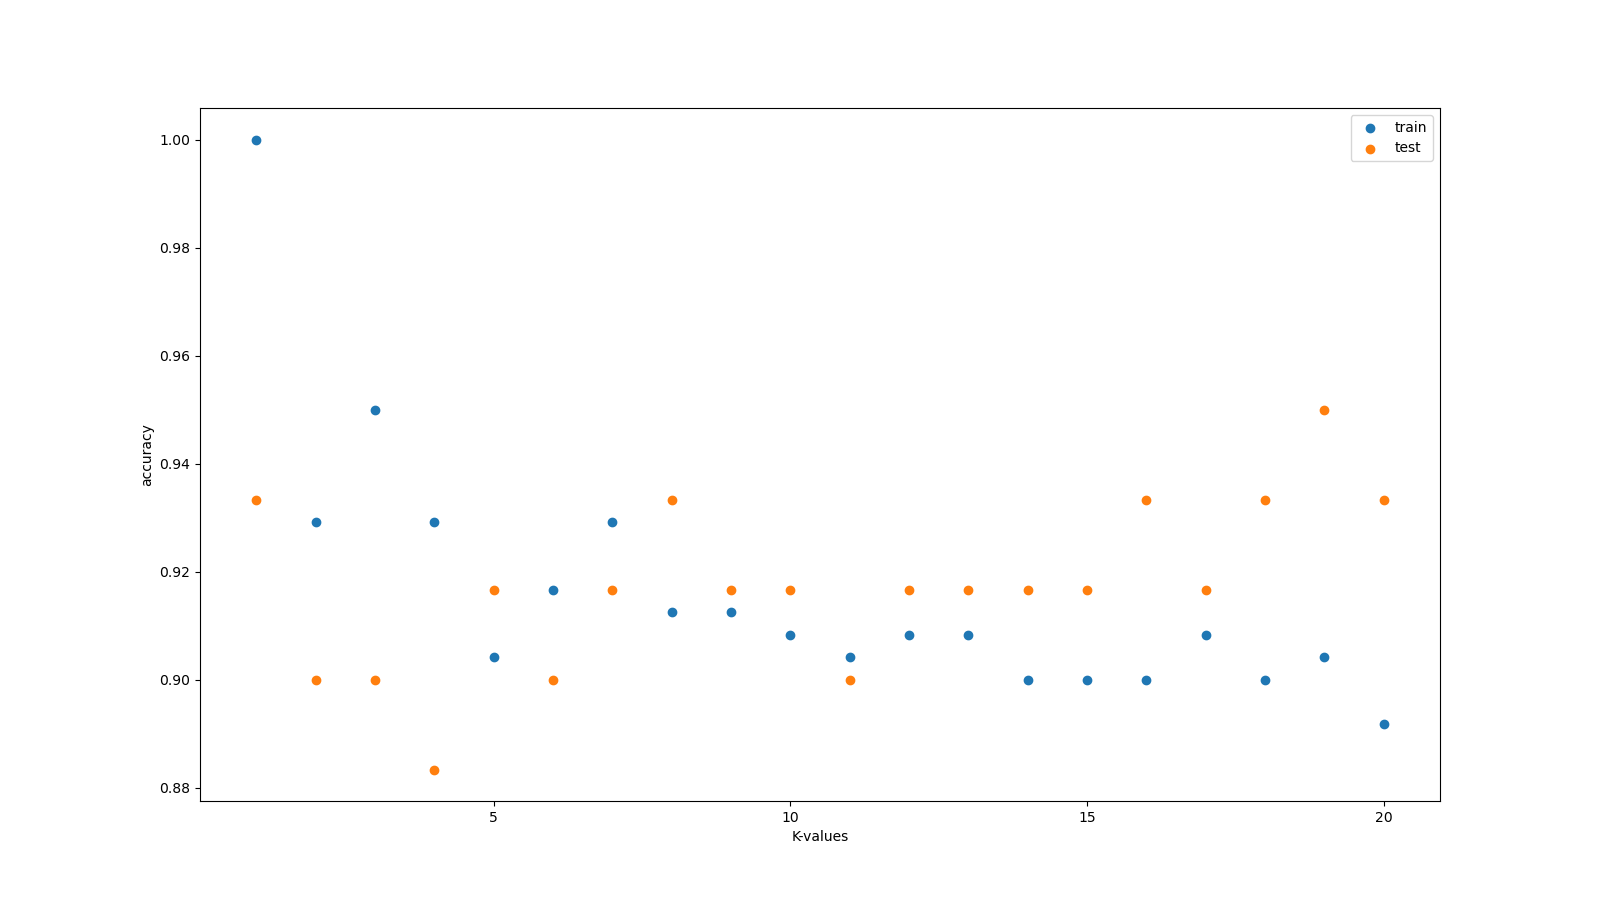

The best k = 19 , score = 0.9041666666666667



In [18]:
#---- Split to train and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, train_size=0.8, random_state=0)

#----- Preparring Data to Train K-NN

#------ Normalization ---
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#----- Training K-NN
from sklearn.neighbors import KNeighborsClassifier
scores_train = []
scores_test=[]

for k_range in range(1,21):
    classifier = KNeighborsClassifier(k_range)
    classifier.fit(X_train, y_train)
    
    #----- Simulation (Prediction)
    y_train_pred = classifier.predict(X_train)
    y_pred = classifier.predict(X_test)
    
    #-------Print results
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

    result3_1 = accuracy_score(y_train, y_train_pred)
    result3_2 = accuracy_score(y_test,y_pred)
    result3_3 = accuracy_score(y_valid,y_validation)
    # print(f"\nAccuracy with [K={k_range}] are :")
    # print(f"\t\t-training Set is:{format(result3_1, '.3f')}")
    # print(f"\t\t-testing Set is:{format(result3_2, '.3f')}")
    # print(f"\t\t-validation Set is:{format(result3_3, '.3f')}\n")
    scores_train.append(result3_1)
    scores_test.append(result3_2)

scores=pd.DataFrame(scores_train, columns=['train'])
scores['test']=pd.DataFrame(scores_test)

fig=plt.figure()
fig = plt.figure(figsize = (16,9))
plt.ylabel('accuracy')
plt.xlabel('K-values')
#plt.legend()

plt.xticks([0,5,10,15,20])
plt.scatter(range(1,21), scores['train'])
plt.scatter(range(1,21), scores['test'])
plt.legend(['train', 'test'])

k_best = scores['test'].argmax()+1 # 'compute the best k'
score_best = scores.iloc[k_best-1,0] #'compute the best score'
print ('The best k = {} , score = {}\n'.format(k_best,score_best ))


Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


<IPython.core.display.Javascript object>


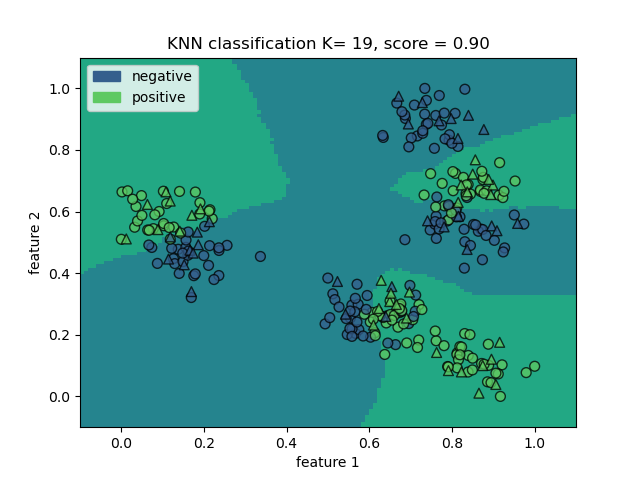

C:\Users\vko\Vasyl_Python\Data_Science_Camp\Tasks\Homework\Lesson5\ML_mst.py:360: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx1, xx2, Z, cmap=cmap_light)


In [19]:

import ML_mst as mst
%matplotlib notebook
clf = KNeighborsClassifier(n_neighbors = k_best)
clf.fit(X_train_scaled, y_train)
score = clf.score (X_test_scaled, y_test)
mst.plot_decision_boundary(clf, X_train_scaled, y_train, X_test=X_test_scaled, y_test= y_test,
                               title='KNN classification K= {}, score = {:.2f}'.format(k_best, score_best), 
                               precision=0.01,plot_symbol_size = 50, )